In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
def generate_random_points(range_start, range_end, num_points):
    return np.random.uniform(range_start, range_end, num_points)

def create_model(num_layers, num_neurons, activation_func):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(num_neurons, activation=activation_func, input_shape=(1,)))

    for _ in range(num_layers - 1):
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation_func))

    model.add(tf.keras.layers.Dense(1))

    return model

def train_model(model, x_train, y_train, num_epochs, validation_split):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=num_epochs,batch_size=100, validation_split=validation_split)


In [26]:
def evaluate_model(model, test_range_start,test_range_end, target_function,tolerance=0.1):
    x = np.linspace(test_range_start,test_range_end, num=1000)
    y_target = target_function(x)
    y_pred = model.predict(x,batch_size=1000)

    correct_predictions = np.sum(np.abs((y_pred.flatten() - y_target) / y_target) < tolerance)
    precision = correct_predictions / len(x) * 100

    plt.figure(figsize=(16,8))
    plt.plot(x, y_target, label='Target Function')
    plt.plot(x, y_pred, label='Approximated Function')
    plt.legend()
    plt.show()

    return precision

In [4]:
function_to_approximate = np.sin
train_range_start = 0.1
train_range_end = 5 * np.pi
num_points = 10000
num_layers = 5
num_neurons = 64
activation_func = 'relu'
num_epochs = 150
validation_split = 0.2

x_train = generate_random_points(train_range_start, train_range_end, num_points)
y_train = function_to_approximate(x_train)

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)


Epoch 1/150
80/80 [==============================] - 2s 6ms/step - loss: 0.4812 - val_loss: 0.4510
Epoch 2/150
80/80 [==============================] - 0s 4ms/step - loss: 0.3768 - val_loss: 0.3551
Epoch 3/150
80/80 [==============================] - 0s 3ms/step - loss: 0.3314 - val_loss: 0.3157
Epoch 4/150
80/80 [==============================] - 0s 4ms/step - loss: 0.3006 - val_loss: 0.2910
Epoch 5/150
80/80 [==============================] - 0s 4ms/step - loss: 0.2856 - val_loss: 0.2787
Epoch 6/150
80/80 [==============================] - 0s 3ms/step - loss: 0.2727 - val_loss: 0.2717
Epoch 7/150
80/80 [==============================] - 0s 4ms/step - loss: 0.2612 - val_loss: 0.2540
Epoch 8/150
80/80 [==============================] - 0s 4ms/step - loss: 0.2214 - val_loss: 0.1827
Epoch 9/150
80/80 [==============================] - 0s 4ms/step - loss: 0.1355 - val_loss: 0.0959
Epoch 10/150
80/80 [==============================] - 0s 5ms/step - loss: 0.0575 - val_loss: 0.0446
Epoch 11/

1/1 [==============================] - 0s 119ms/step


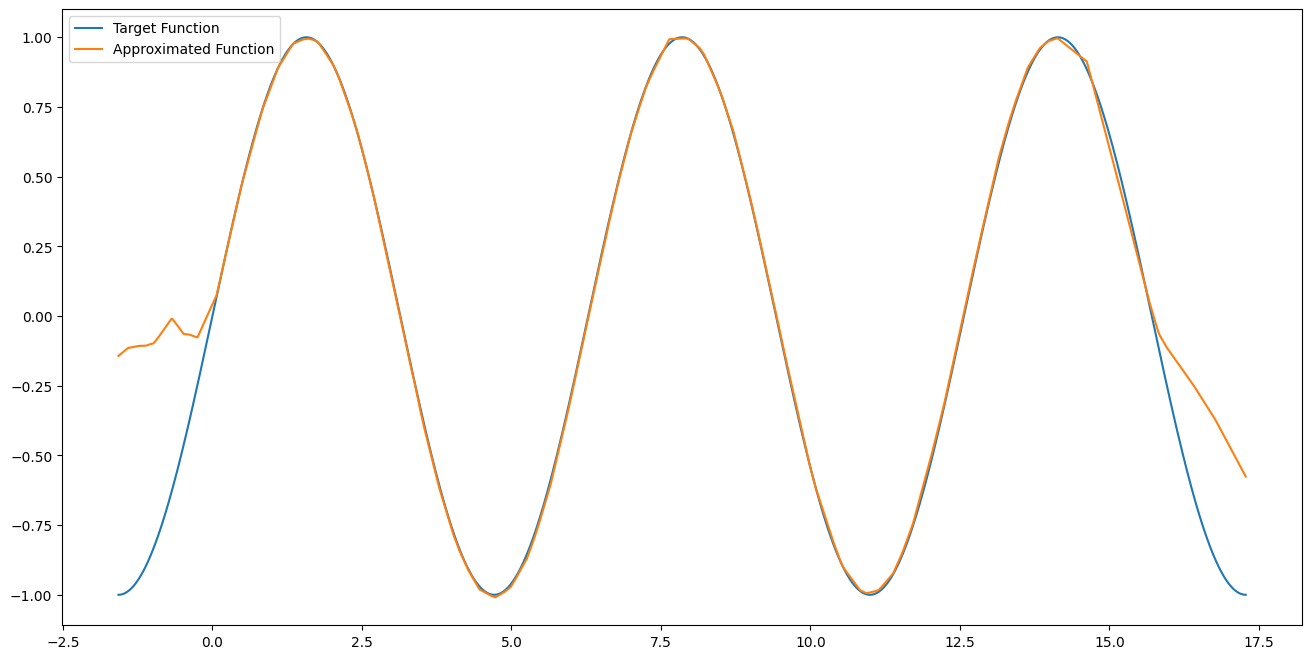

Precision: 80.30%


In [5]:

test_range_start = -0.5 * np.pi
test_range_end = 5.5 * np.pi

precision = evaluate_model(model, test_range_start,test_range_end, function_to_approximate,tolerance = 0.15)
print("Precision: {:.2f}%".format(precision))

In [6]:
function_to_approximate = np.log
train_range_start = 0.1
train_range_end = 100
num_points = 1000
num_layers = 5
num_neurons = 64
activation_func = 'relu'
num_epochs = 150
validation_split = 0.2

x_train = generate_random_points(train_range_start, train_range_end, num_points)
y_train = function_to_approximate(x_train)

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)

Epoch 1/150
8/8 [==============================] - 2s 46ms/step - loss: 4.0222 - val_loss: 1.6963
Epoch 2/150
8/8 [==============================] - 0s 11ms/step - loss: 1.5735 - val_loss: 1.5140
Epoch 3/150
8/8 [==============================] - 0s 12ms/step - loss: 1.3706 - val_loss: 1.4170
Epoch 4/150
8/8 [==============================] - 0s 11ms/step - loss: 1.2846 - val_loss: 1.3759
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: 1.2374 - val_loss: 1.3297
Epoch 6/150
8/8 [==============================] - 0s 14ms/step - loss: 1.1816 - val_loss: 1.2743
Epoch 7/150
8/8 [==============================] - 0s 28ms/step - loss: 1.1373 - val_loss: 1.2303
Epoch 8/150
8/8 [==============================] - 0s 28ms/step - loss: 1.0915 - val_loss: 1.1730
Epoch 9/150
8/8 [==============================] - 0s 26ms/step - loss: 1.0602 - val_loss: 1.1743
Epoch 10/150
8/8 [==============================] - 0s 28ms/step - loss: 1.0223 - val_loss: 1.0725
Epoch 11/150
8/8 [=

1/1 [==============================] - 0s 81ms/step


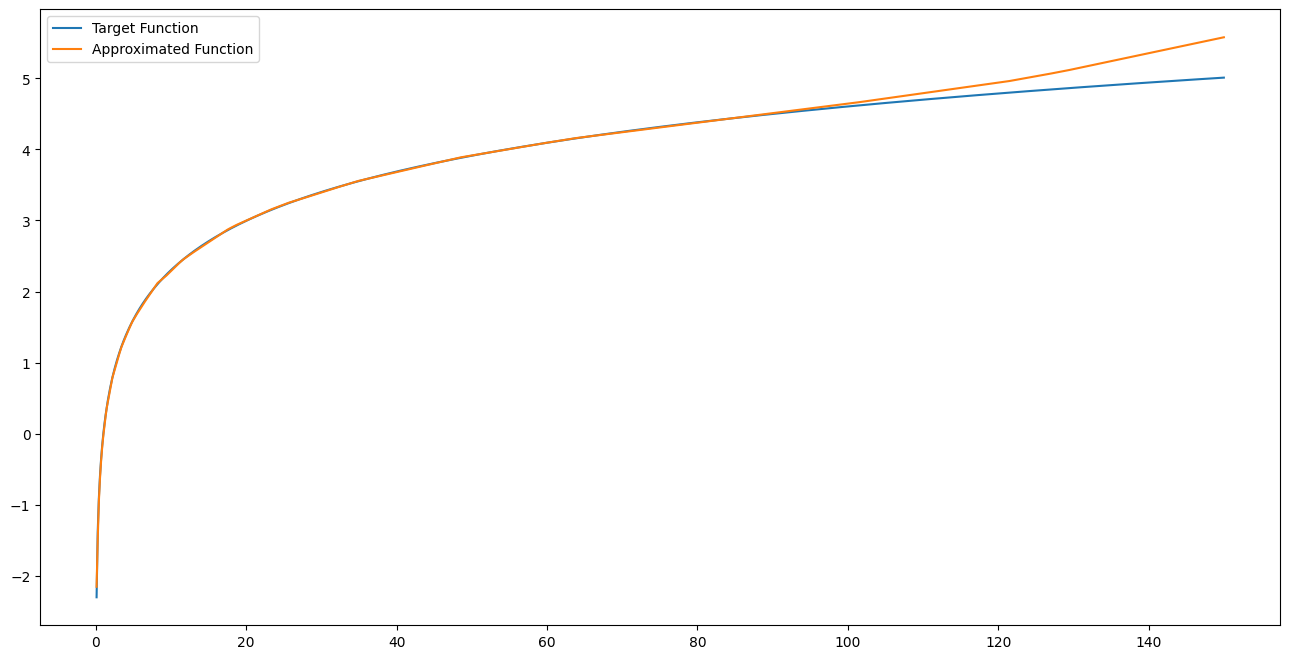

Precision: 96.70%


In [7]:
test_range_start = 0.1
test_range_end = 150

precision = evaluate_model(model, test_range_start,test_range_end, function_to_approximate)
print("Precision: {:.2f}%".format(precision))

In [8]:
def f(x):
  return pow(x,3) + 3 * pow(x,2) + 1

function_to_approximate = f
train_range_start = -10
train_range_end = 10
num_points = 1000
num_layers = 5
num_neurons = 64
activation_func = 'relu'
num_epochs = 150
validation_split = 0.2

x_train = generate_random_points(train_range_start, train_range_end, num_points)
y_train = function_to_approximate(x_train)

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)

Epoch 1/150
8/8 [==============================] - 2s 33ms/step - loss: 157380.5625 - val_loss: 186294.7656
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 156701.4844 - val_loss: 185301.0000
Epoch 3/150
8/8 [==============================] - 0s 11ms/step - loss: 155423.7188 - val_loss: 183071.2656
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 152427.2344 - val_loss: 177960.7812
Epoch 5/150
8/8 [==============================] - 0s 10ms/step - loss: 146077.3438 - val_loss: 166768.2344
Epoch 6/150
8/8 [==============================] - 0s 8ms/step - loss: 132067.8438 - val_loss: 144061.2344
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 105938.7031 - val_loss: 103948.6562
Epoch 8/150
8/8 [==============================] - 0s 7ms/step - loss: 64988.9648 - val_loss: 53543.3242
Epoch 9/150
8/8 [==============================] - 0s 7ms/step - loss: 34756.1367 - val_loss: 34242.7734
Epoch 10/150
8/8 [===================

1/1 [==============================] - 0s 35ms/step


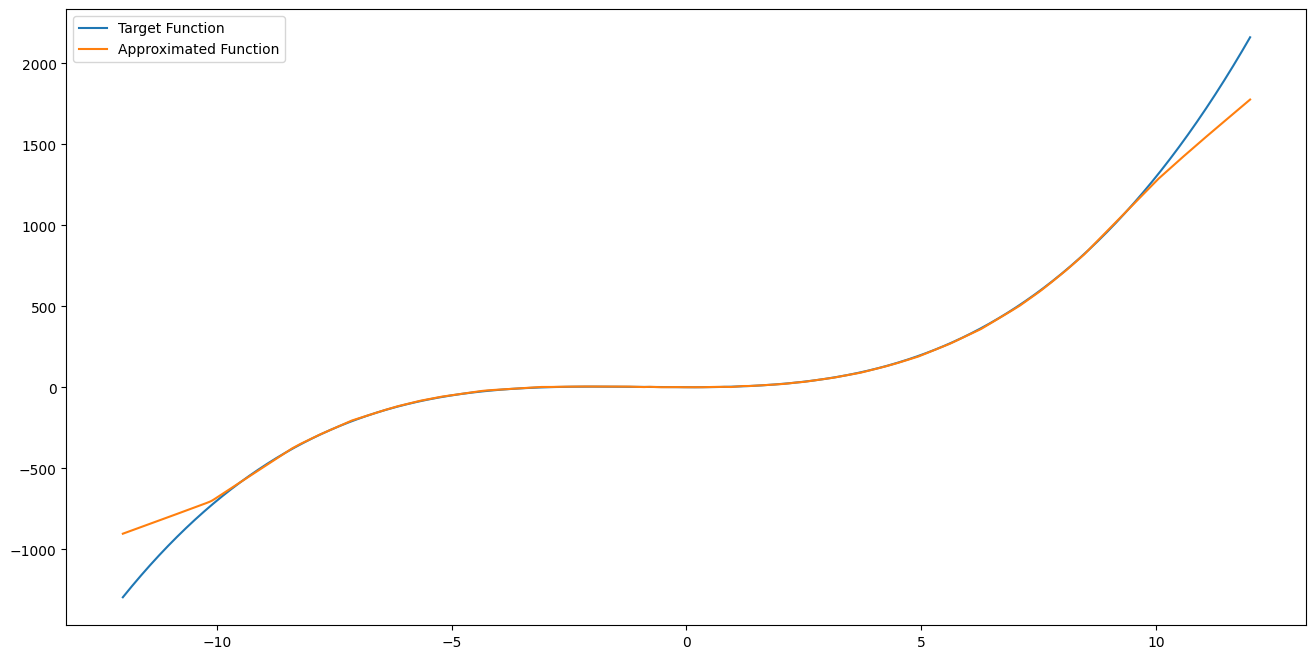

Precision: 89.40%


In [14]:
test_range_start = -12
test_range_end = 12

precision = evaluate_model(model, test_range_start,test_range_end, function_to_approximate,tolerance = 0.25)
print("Precision: {:.2f}%".format(precision))

In [28]:
def g(x):
  return pow(x,4) - 5 * pow(x,2) + 4

function_to_approximate = g
train_range_start = -10
train_range_end = 10
num_points = 10000
num_layers = 5
num_neurons = 64
activation_func = 'relu'
num_epochs = 150
validation_split = 0.2

x_train = generate_random_points(train_range_start, train_range_end, num_points)
y_train = function_to_approximate(x_train)

model = create_model(num_layers, num_neurons, activation_func)
train_model(model, x_train, y_train, num_epochs, validation_split)

Epoch 1/150
80/80 [==============================] - 2s 11ms/step - loss: 8685005.0000 - val_loss: 2762391.0000
Epoch 2/150
80/80 [==============================] - 0s 6ms/step - loss: 2887433.7500 - val_loss: 2500764.0000
Epoch 3/150
80/80 [==============================] - 0s 5ms/step - loss: 2637860.7500 - val_loss: 2319844.7500
Epoch 4/150
80/80 [==============================] - 0s 6ms/step - loss: 2428308.0000 - val_loss: 2154317.5000
Epoch 5/150
80/80 [==============================] - 0s 5ms/step - loss: 2135291.0000 - val_loss: 1758131.8750
Epoch 6/150
80/80 [==============================] - 0s 5ms/step - loss: 1653362.3750 - val_loss: 1148368.8750
Epoch 7/150
80/80 [==============================] - 1s 15ms/step - loss: 810086.3125 - val_loss: 371726.3750
Epoch 8/150
80/80 [==============================] - 1s 9ms/step - loss: 206057.9375 - val_loss: 72473.1094
Epoch 9/150
80/80 [==============================] - 1s 7ms/step - loss: 54135.4844 - val_loss: 24862.3984
Epoch 10

1/1 [==============================] - 0s 97ms/step


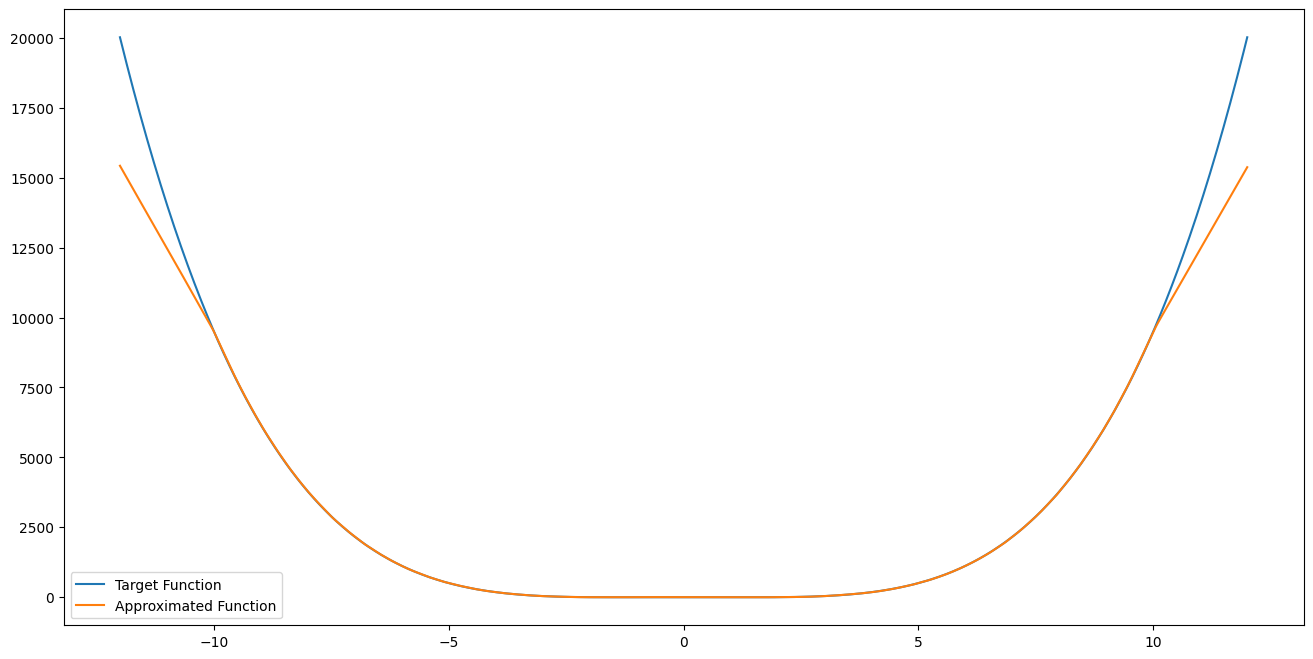

Precision: 87.60%


In [29]:
test_range_start = -12
test_range_end = 12

precision = evaluate_model(model, test_range_start,test_range_end, g,tolerance = 0.25)
print("Precision: {:.2f}%".format(precision))